In [152]:
import os
import numpy as np
import xarray as xr
import geopandas as gpd
import clima_anom as ca

import cartopy.crs as ccrs
import cartopy.feature as cfeature

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec

import sys
sys.path.append(os.path.abspath(".."))
from function import ART_downscale as ART_down

In [134]:
lon_min, lon_max, lat_min, lat_max, area, toll = 6.5, 19, 36.5, 48, 'ITALY', 0.002

Tr = [5,  10,  20,  50, 100, 200]

In [135]:
veneto_dir = os.path.join('/','media','arturo','T9','Data','shapes','Europa','Italy')

if os.path.exists(veneto_dir):
    REGIONS = gpd.read_file(os.path.join(veneto_dir,'Italy_regions.geojson'))
    DEM = gpd.read_file(os.path.join(veneto_dir,'DEM','Italy_dem_800.geojson')) 
else:
    raise SystemExit(f"File not found: {veneto_dir}")

In [136]:
sat_base = os.path.join('/','media','arturo','T9','Data','Italy','Satellite','5_DOWN')
ENS_base = os.path.join('/','media','arturo','T9','Data','Italy','Satellite','5_ENSEMBLE')

In [137]:
product, time_reso = 'IMERG', '1dy'
dir_in = os.path.join(sat_base, f'ITALY_DOWN_{product}_{time_reso}_2002_2023_npix_2_thr_1_acf_mar_genetic_pearson.nc')

DATA = xr.open_dataset(dir_in)

lon2dIM, lat2dIM = DATA.lon.data, DATA.lat.data

MEVs_IM = DATA.Mev_s.data
MEVd_IM = DATA.Mev_d.data

In [138]:
product, time_reso = 'CMORPH', '3h'
dir_in = os.path.join(sat_base, f'ITALY_DOWN_{product}_{time_reso}_2002_2023_npix_2_thr_1_acf_mar_genetic_pearson.nc')

DATA = xr.open_dataset(dir_in)

lon2dCM, lat2dCM = DATA.lon.data, DATA.lat.data

MEVs_CM = DATA.Mev_s.data
MEVd_CM = DATA.Mev_d.data

In [139]:
product, time_reso = 'ERA5', '3h'
dir_in = os.path.join(sat_base, f'ITALY_DOWN_{product}_{time_reso}_2002_2023_npix_2_thr_1_acf_mar_genetic_pearson.nc')

DATA = xr.open_dataset(dir_in)

lon2dER, lat2dER = DATA.lon.data, DATA.lat.data

MEVs_ER = DATA.Mev_s.data
MEVd_ER = DATA.Mev_d.data

In [140]:
product, time_reso = 'MSWEP', '3h'
dir_in = os.path.join(sat_base, f'ITALY_DOWN_{product}_{time_reso}_2002_2023_npix_2_thr_1_acf_mar_genetic_pearson.nc')

DATA = xr.open_dataset(dir_in)

lon2dMS, lat2dMS = DATA.lon.data, DATA.lat.data

MEVs_MS = DATA.Mev_s.data
MEVd_MS = DATA.Mev_d.data

In [141]:
product, time_reso = 'CHIRPS', '1dy'
dir_in = os.path.join(sat_base, f'ITALY_DOWN_{product}_{time_reso}_2002_2023_npix_2_thr_1_acf_mar_genetic_pearson.nc')

DATA = xr.open_dataset(dir_in)

lon2dCH, lat2dCH = DATA.lon.data, DATA.lat.data

MEVs_CH = DATA.Mev_s.data
MEVd_CH = DATA.Mev_d.data

In [142]:
product, time_reso = 'GSMaP', '3h'
dir_in = os.path.join(sat_base, f'ITALY_DOWN_{product}_{time_reso}_2002_2023_npix_2_thr_1_acf_mar_genetic_pearson.nc')

DATA = xr.open_dataset(dir_in)

lon2dGS, lat2dGS = DATA.lon.data, DATA.lat.data

MEVs_GS = DATA.Mev_s.data
MEVd_GS = DATA.Mev_d.data

NGS = DATA.NYd.values
CGS = DATA.CYd.values
WGS = DATA.WYd.values
Fi = 1 - 1/np.array(Tr)

In [143]:
GSMAP2 = ART_down.pre_quantiles_array(
                        NGS, 
                        CGS, 
                        WGS, 
                        Tr, 
                        DATA.lat.data, DATA.lon.data,
                        1)

/home/arturo/github/downpy/function/ART_downscale.py:388: RuntimeWarning: invalid value encountered in power
  mev0f = np.sum( ( 1-np.exp(-(y/C)**W ))**N) - nyears*pr


In [144]:
ENSEMBLE_SAT = 'ALL'
product, time_reso = 'ENSEMBLE_mean', '1dy'
dir_in = os.path.join(ENS_base,f'ITALY_ENSEMBLE_{ENSEMBLE_SAT}_{time_reso}_2002_2023_npix_2_thr_1_acf_mar_genetic_pearson_mean.nc')

DATA = xr.open_dataset(dir_in)

lon2dEN, lat2dEN = DATA.lon.data, DATA.lat.data

MEVs_MEAN = DATA.Mev_s.data
MEVd_MEAN = DATA.Mev_d.data

In [145]:
ENSEMBLE_SAT = 'ALL'
product, time_reso = 'ENSEMBLE_median', '1dy'
dir_in = os.path.join(ENS_base,f'ITALY_ENSEMBLE_{ENSEMBLE_SAT}_{time_reso}_2002_2023_npix_2_thr_1_acf_mar_genetic_pearson_median.nc')

DATA = xr.open_dataset(dir_in)

MEVs_MEDIAN = DATA.Mev_s.data
MEVd_MEDIAN = DATA.Mev_d.data

In [165]:
pos = 3
print(f'Plotting for return period: {Tr[pos]} years')

if pos == 0:
    Mev_levels = np.arange(20, 200, 20)
elif pos == 1:
    Mev_levels = np.arange(20, 220, 20)
elif pos == 3:
    Mev_levels = np.arange(20, 320, 20)
elif pos == 4:
    Mev_levels = np.arange(20, 480, 20)
elif pos == 5:
    Mev_levels = np.arange(40, 740, 40)
else:
    Mev_levels = None

Plotting for return period: 50 years


Export figure to: ../figures/Article_down/Quantiles_ALL_RAW_50yrs.png


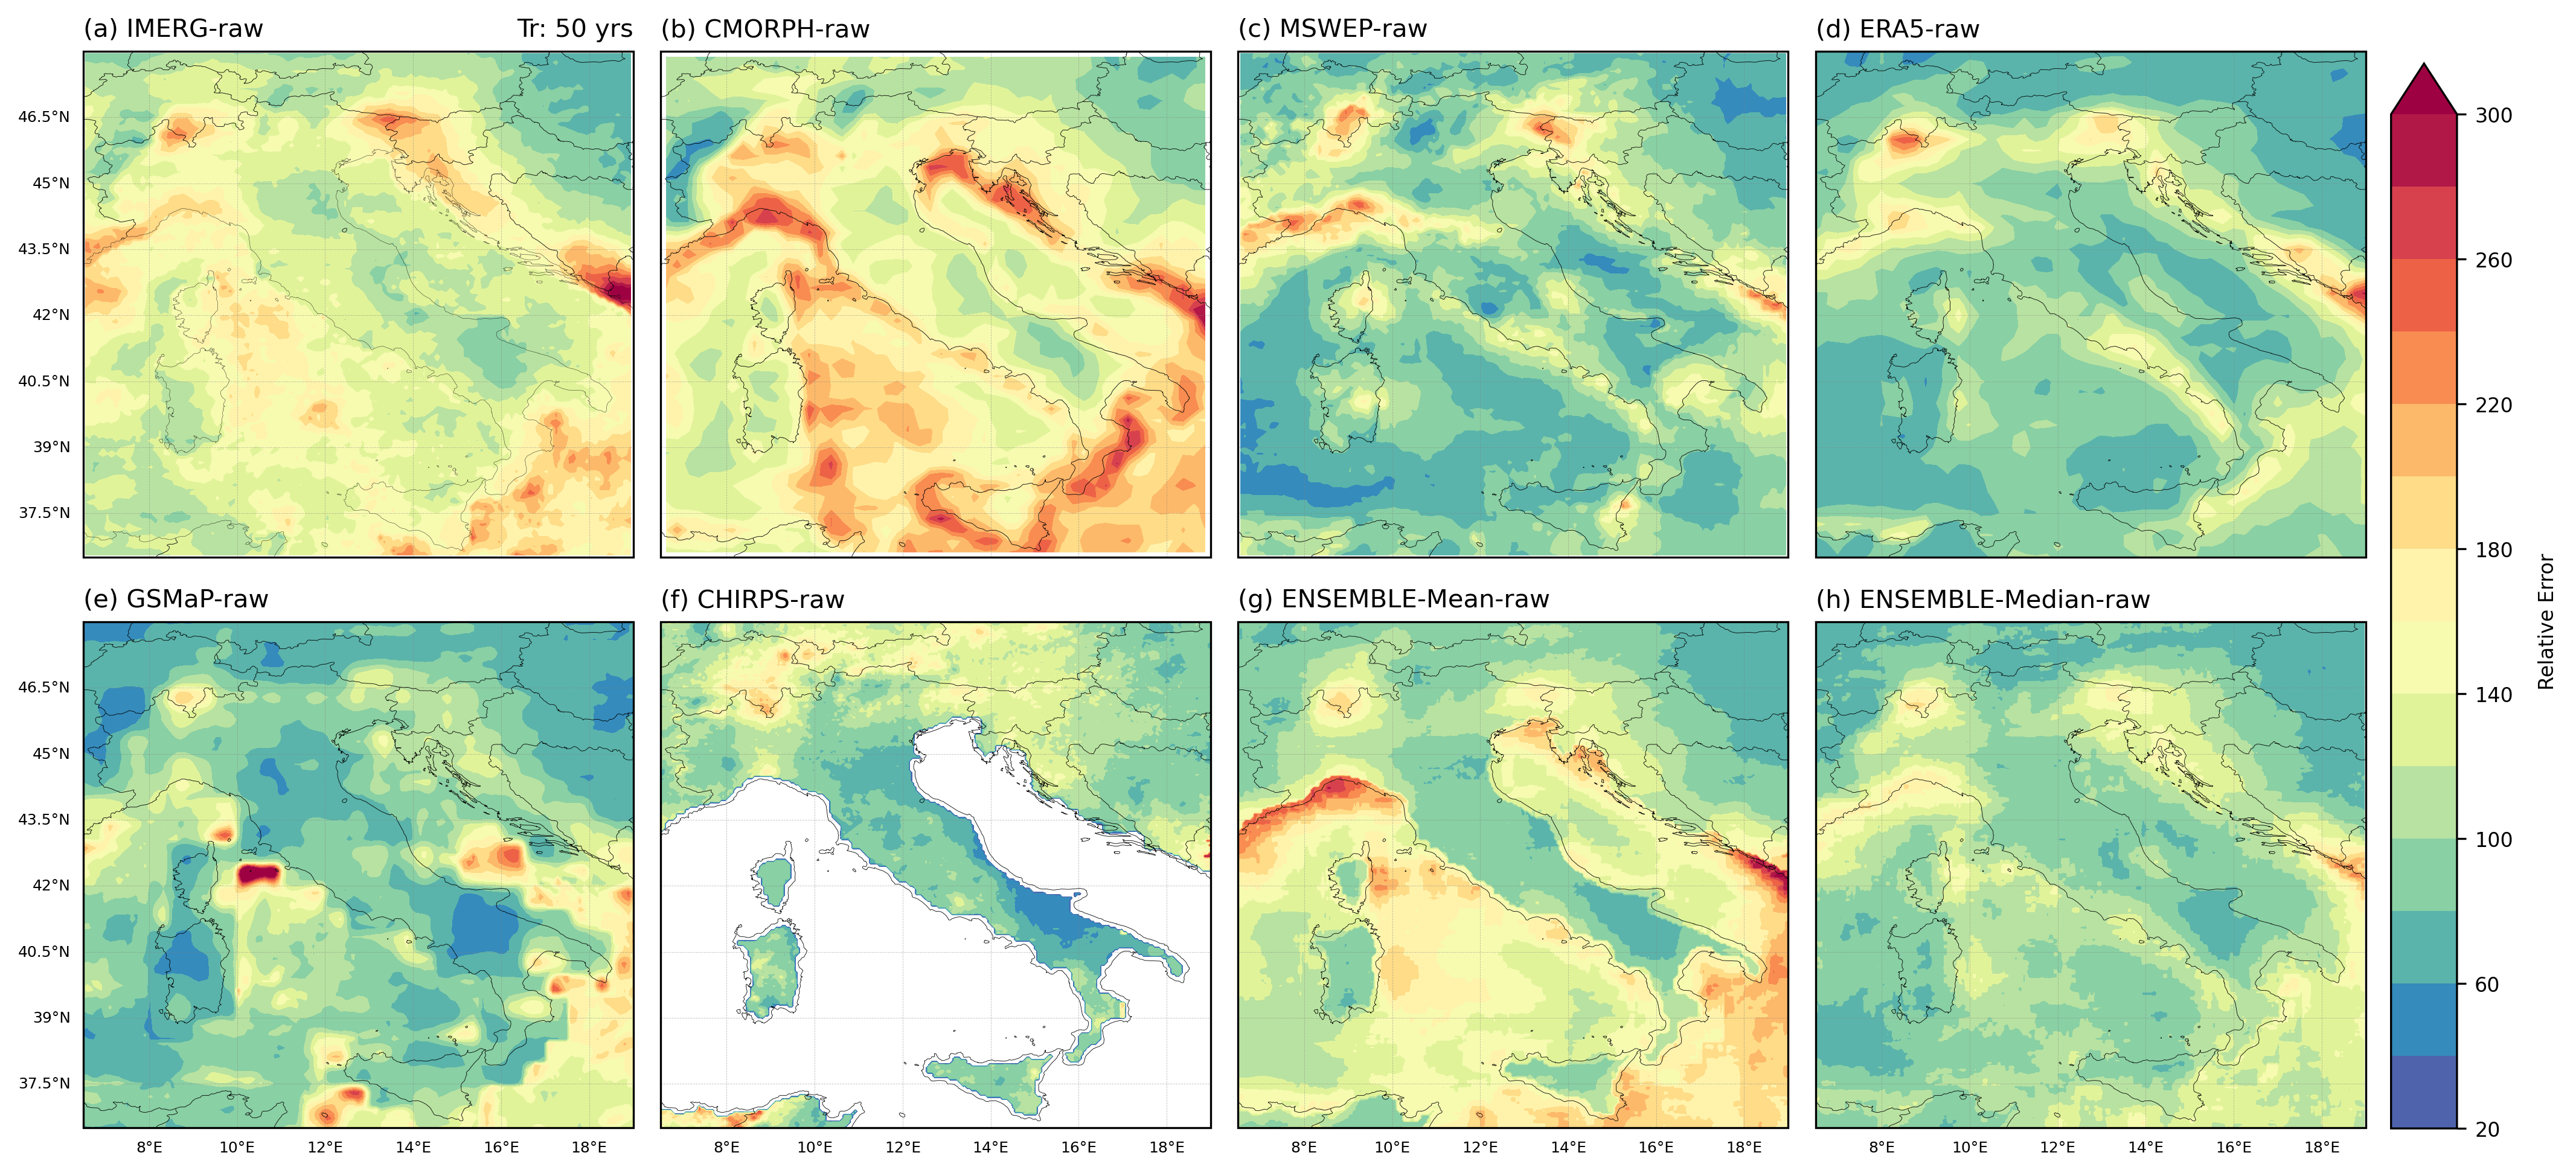

In [147]:
fonttitle = 10

Mev_cmap = plt.cm.Spectral_r
Mev_diff = plt.cm.coolwarm_r

proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(14,7),dpi=300)
gs = gridspec.GridSpec(2,4)

# ===========================================================================================================================================================================
# ===========================================================================================================================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.1,edgecolor='k')
ax1.add_feature(cfeature.BORDERS,linewidth=0.2,edgecolor='black',zorder=4)
# im = REGIONS_merged.plot(legend=False, facecolor="none", edgecolor='black', linewidth=0.1, ax=ax1, zorder=10)
# DEM.plot(facecolor='None', edgecolor='k', ax=ax1, linewidth=0.1, zorder=21, alpha=0.5)
a1 = ax1.contourf(lon2dIM, lat2dIM, MEVs_IM[pos,:,:], cmap=Mev_cmap, levels=Mev_levels, extend='max')

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = False
gl.right_labels = False
gl.left_labels = True
gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}

# cbar = plt.colorbar(a1, ax=ax1, fraction=0.056, pad=0.04)
# cbar.ax.tick_params(labelsize=6) 

ax1.set_title('(a) IMERG-raw', fontsize=fonttitle, loc='left')
ax1.set_title(f'Tr: {Tr[pos]} yrs', fontsize=fonttitle, loc='right')

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 1], projection = proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.2,edgecolor='k')
ax1.add_feature(cfeature.BORDERS,linewidth=0.2,edgecolor='black',zorder=4)
# im = REGIONS_merged.plot(legend=False, facecolor="none", edgecolor='black', linewidth=0.1, ax=ax1, zorder=10)
# DEM.plot(facecolor='None', edgecolor='k', ax=ax1, linewidth=0.1, zorder=21, alpha=0.5)
a1 = ax1.contourf(lon2dCM, lat2dCM, MEVs_CM[pos,:,:], cmap=Mev_cmap, levels=Mev_levels, extend='max')

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = False
gl.right_labels = False
gl.left_labels =False
gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}

# cbar = plt.colorbar(a1, ax=ax1, fraction=0.056, pad=0.04)
# cbar.ax.tick_params(labelsize=6) 

ax1.set_title('(b) CMORPH-raw', fontsize=fonttitle, loc='left')

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 2], projection = proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.2,edgecolor='k')
ax1.add_feature(cfeature.BORDERS,linewidth=0.2,edgecolor='black',zorder=4)
# im = REGIONS_merged.plot(legend=False, facecolor="none", edgecolor='black', linewidth=0.1, ax=ax1, zorder=10)
# DEM.plot(facecolor='None', edgecolor='k', ax=ax1, linewidth=0.1, zorder=21, alpha=0.5)
a1 = ax1.contourf(lon2dMS, lat2dMS, MEVs_MS[pos,:,:], cmap=Mev_cmap, levels=Mev_levels, extend='max')

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = False
gl.right_labels = False
gl.left_labels =False
gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}

# cbar = plt.colorbar(a1, ax=ax1, fraction=0.056, pad=0.04)
# cbar.ax.tick_params(labelsize=6) 

ax1.set_title('(c) MSWEP-raw', fontsize=fonttitle, loc='left')

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 3], projection = proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.2,edgecolor='k')
ax1.add_feature(cfeature.BORDERS,linewidth=0.2,edgecolor='black',zorder=4)
# im = REGIONS_merged.plot(legend=False, facecolor="none", edgecolor='black', linewidth=0.1, ax=ax1, zorder=10)
# DEM.plot(facecolor='None', edgecolor='k', ax=ax1, linewidth=0.1, zorder=21, alpha=0.5)
a1 = ax1.contourf(lon2dER, lat2dER, MEVs_ER[pos,:,:], cmap=Mev_cmap, levels=Mev_levels, extend='max')

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = False
gl.right_labels = False
gl.left_labels = False
gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}

# cbar = plt.colorbar(a1, ax=ax1, fraction=0.056, pad=0.04)
# cbar.ax.tick_params(labelsize=6) 

ax1.set_title('(d) ERA5-raw', fontsize=fonttitle, loc='left')

# ===========================================================================================================================================================================
# ===========================================================================================================================================================================
ax1 = plt.subplot(gs[1, 0], projection = proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.2,edgecolor='k')
ax1.add_feature(cfeature.BORDERS,linewidth=0.2,edgecolor='black',zorder=4)
# im = REGIONS_merged.plot(legend=False, facecolor="none", edgecolor='black', linewidth=0.1, ax=ax1, zorder=10)
# DEM.plot(facecolor='None', edgecolor='k', ax=ax1, linewidth=0.1, zorder=21, alpha=0.5)
a1 = ax1.contourf(lon2dGS, lat2dGS, MEVs_GS[pos,:,:], cmap=Mev_cmap, levels=Mev_levels, extend='max')

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.right_labels = False
gl.left_labels =True
gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}

# cbar = plt.colorbar(a1, ax=ax1, fraction=0.056, pad=0.04)
# cbar.ax.tick_params(labelsize=6) 

ax1.set_title('(e) GSMaP-raw', fontsize=fonttitle, loc='left')

# ============================================================================================================================
ax1 = plt.subplot(gs[1, 1], projection = proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.2,edgecolor='k')
ax1.add_feature(cfeature.BORDERS,linewidth=0.2,edgecolor='black',zorder=4)
# im = REGIONS_merged.plot(legend=False, facecolor="none", edgecolor='black', linewidth=0.1, ax=ax1, zorder=10)
# DEM.plot(facecolor='None', edgecolor='k', ax=ax1, linewidth=0.1, zorder=21, alpha=0.5)
a1 = ax1.contourf(lon2dCH, lat2dCH, MEVs_CH[pos,:,:], cmap=Mev_cmap, levels=Mev_levels, extend='max')

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.right_labels = False
gl.left_labels =False
gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}

# cbar = plt.colorbar(a1, ax=ax1, fraction=0.056, pad=0.04)
# cbar.ax.tick_params(labelsize=6) 

ax1.set_title('(f) CHIRPS-raw', fontsize=fonttitle, loc='left')

# ============================================================================================================================
ax1 = plt.subplot(gs[1, 2], projection = proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.2,edgecolor='k')
ax1.add_feature(cfeature.BORDERS,linewidth=0.2,edgecolor='black',zorder=4)
# im = REGIONS_merged.plot(legend=False, facecolor="none", edgecolor='black', linewidth=0.1, ax=ax1, zorder=10)
# DEM.plot(facecolor='None', edgecolor='k', ax=ax1, linewidth=0.1, zorder=21, alpha=0.5)
a1 = ax1.contourf(lon2dEN, lat2dEN, MEVs_MEAN[pos,:,:], cmap=Mev_cmap, levels=Mev_levels, extend='max')

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.right_labels = False
gl.left_labels =False
gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}

# cbar = plt.colorbar(a1, ax=ax1, fraction=0.056, pad=0.04)
# cbar.ax.tick_params(labelsize=6) 

ax1.set_title('(g) ENSEMBLE-Mean-raw', fontsize=fonttitle, loc='left')

# ============================================================================================================================
ax1 = plt.subplot(gs[1, 3], projection = proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.2,edgecolor='k')
ax1.add_feature(cfeature.BORDERS,linewidth=0.2,edgecolor='black',zorder=4)
# im = REGIONS_merged.plot(legend=False, facecolor="none", edgecolor='black', linewidth=0.1, ax=ax1, zorder=10)
# DEM.plot(facecolor='None', edgecolor='k', ax=ax1, linewidth=0.1, zorder=21, alpha=0.5)
a1 = ax1.contourf(lon2dEN, lat2dEN, MEVs_MEDIAN[pos,:,:], cmap=Mev_cmap, levels=Mev_levels, extend='max')

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.right_labels = False
gl.left_labels =False
gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}

# cbar = plt.colorbar(a1, ax=ax1, fraction=0.056, pad=0.04)
# cbar.ax.tick_params(labelsize=6) 

ax1.set_title('(h) ENSEMBLE-Median-raw', fontsize=fonttitle, loc='left')

# ===========================================================================================================================================================================
# ===========================================================================================================================================================================
plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.05, hspace=0)

cbar_ax = fig.add_axes([0.96, 0.075, 0.026, 0.84])#0.96
cbar = fig.colorbar(a1, cax=cbar_ax, orientation='vertical')
cbar.ax.tick_params(labelsize=8)
cbar.set_label("Relative Error", fontsize=8, labelpad=10)

salida = os.path.join('..','figures','Article_down',f'Quantiles_ALL_RAW_{Tr[pos]}yrs.png')
print(f'Export figure to: {salida}')
plt.savefig(salida,transparent = False,bbox_inches ='tight',pad_inches = 0.1, facecolor=None)

Export figure to: ../figures/Article_down/Quantiles_ALL_DOWN_50yrs.png


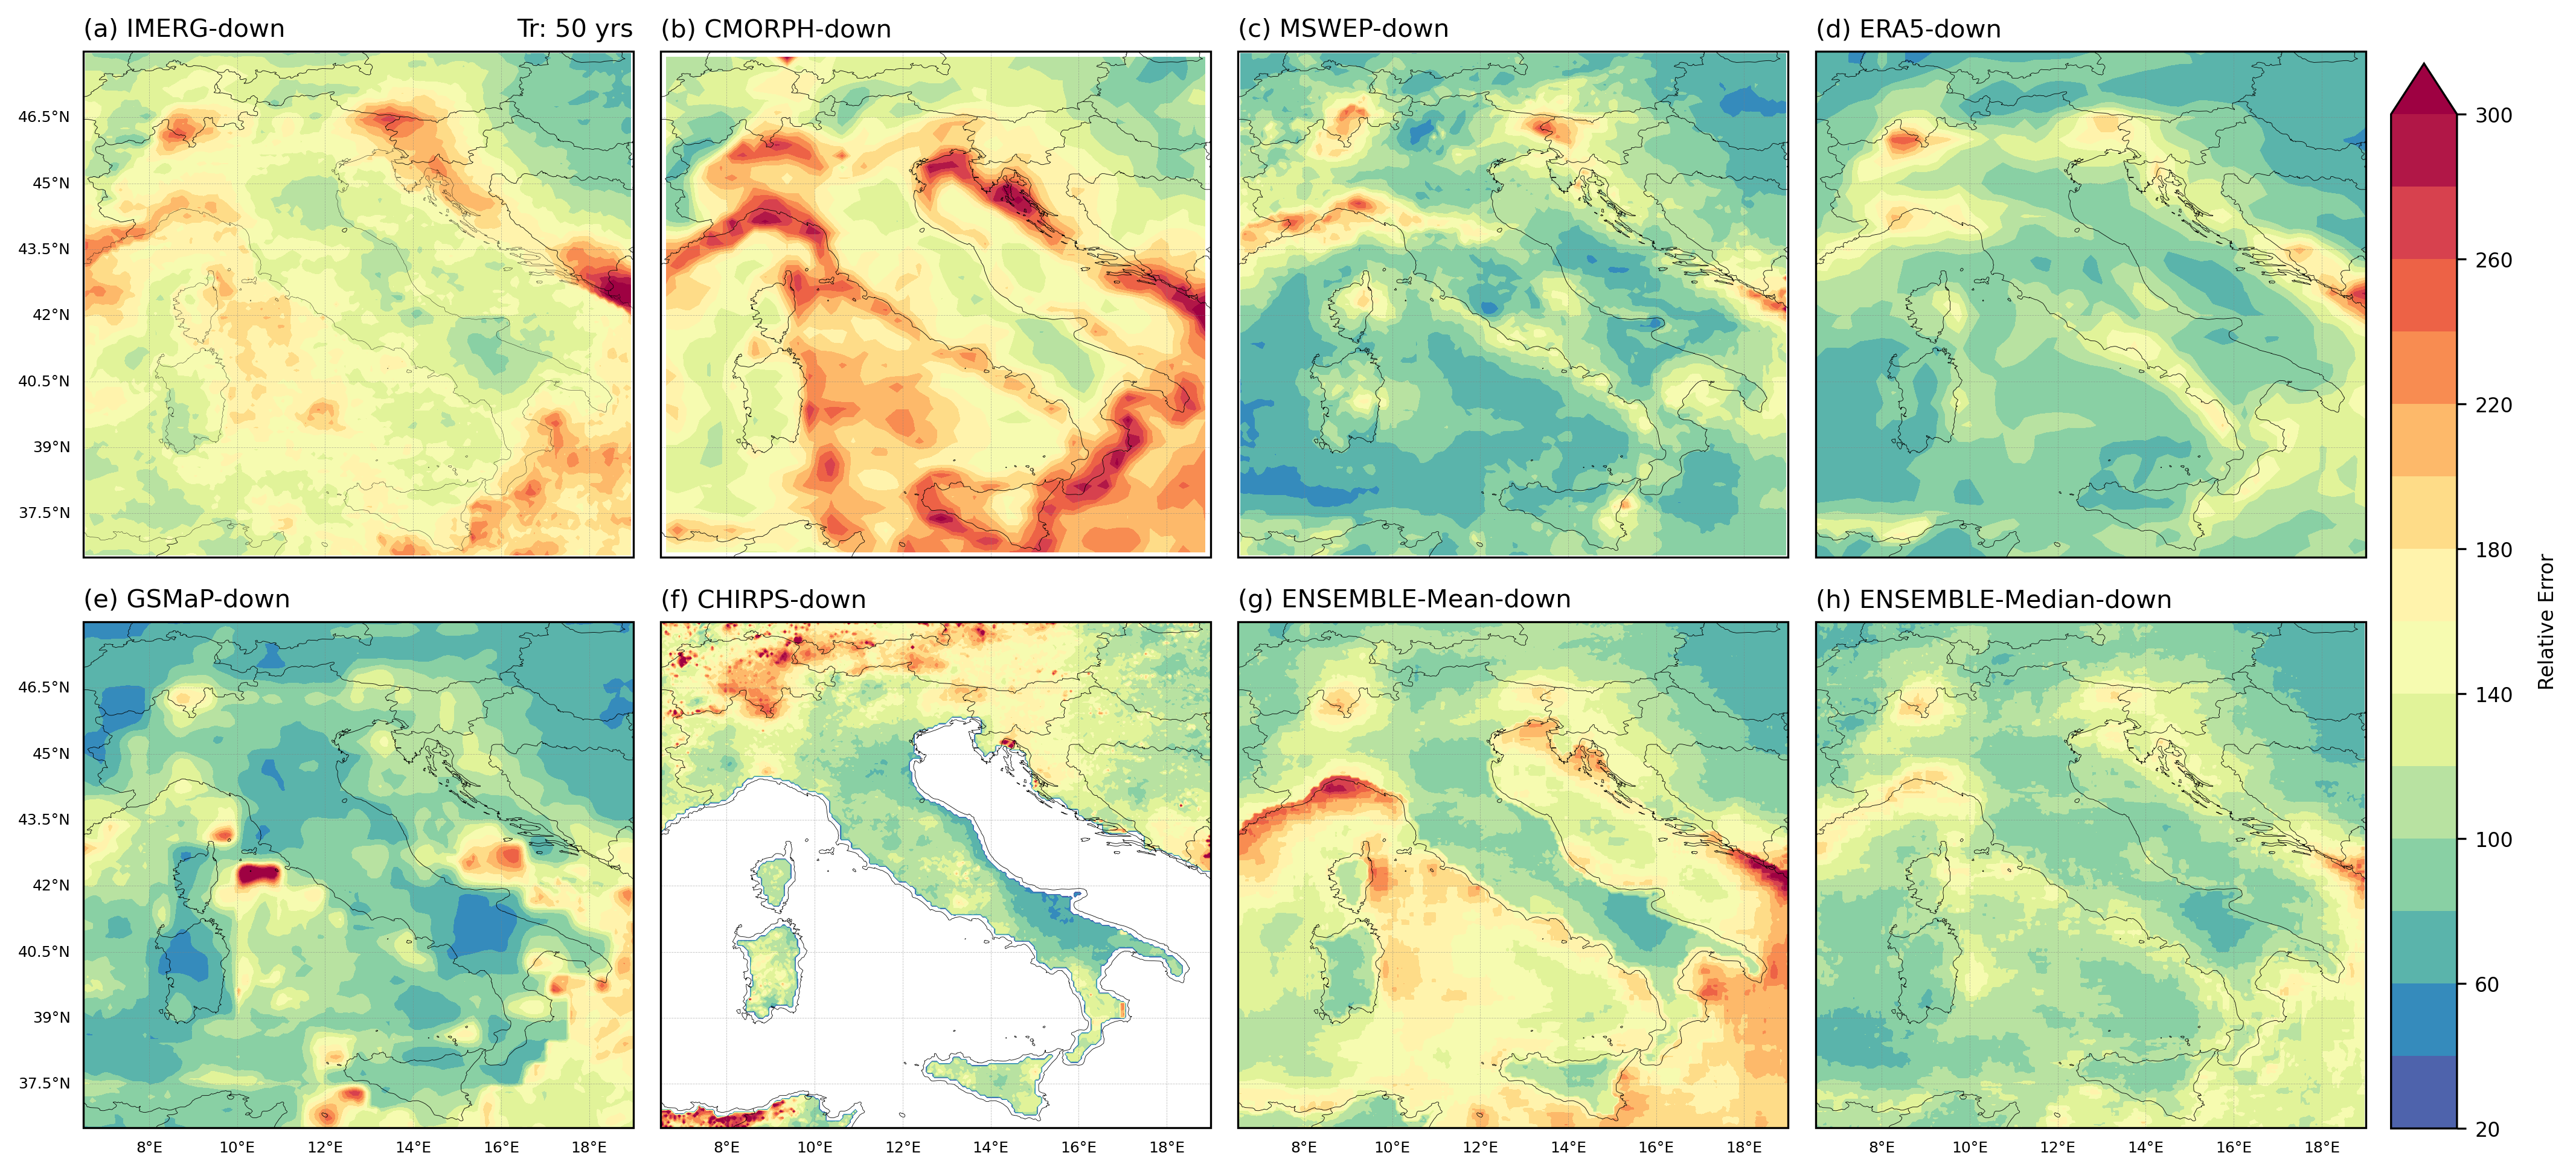

In [148]:
fonttitle = 10

Mev_cmap = plt.cm.Spectral_r
Mev_diff = plt.cm.coolwarm_r

proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(14,7),dpi=300)
gs = gridspec.GridSpec(2,4)

# ===========================================================================================================================================================================
# ===========================================================================================================================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.1,edgecolor='k')
ax1.add_feature(cfeature.BORDERS,linewidth=0.2,edgecolor='black',zorder=4)
# im = REGIONS_merged.plot(legend=False, facecolor="none", edgecolor='black', linewidth=0.1, ax=ax1, zorder=10)
# DEM.plot(facecolor='None', edgecolor='k', ax=ax1, linewidth=0.1, zorder=21, alpha=0.5)
a1 = ax1.contourf(lon2dIM, lat2dIM, MEVd_IM[pos,:,:], cmap=Mev_cmap, levels=Mev_levels, extend='max')

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = False
gl.right_labels = False
gl.left_labels = True
gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}

# cbar = plt.colorbar(a1, ax=ax1, fraction=0.056, pad=0.04)
# cbar.ax.tick_params(labelsize=6) 

ax1.set_title('(a) IMERG-down', fontsize=fonttitle, loc='left')
ax1.set_title(f'Tr: {Tr[pos]} yrs', fontsize=fonttitle, loc='right')

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 1], projection = proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.2,edgecolor='k')
ax1.add_feature(cfeature.BORDERS,linewidth=0.2,edgecolor='black',zorder=4)
# im = REGIONS_merged.plot(legend=False, facecolor="none", edgecolor='black', linewidth=0.1, ax=ax1, zorder=10)
# DEM.plot(facecolor='None', edgecolor='k', ax=ax1, linewidth=0.1, zorder=21, alpha=0.5)
a1 = ax1.contourf(lon2dCM, lat2dCM, MEVd_CM[pos,:,:], cmap=Mev_cmap, levels=Mev_levels, extend='max')

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = False
gl.right_labels = False
gl.left_labels =False
gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}

# cbar = plt.colorbar(a1, ax=ax1, fraction=0.056, pad=0.04)
# cbar.ax.tick_params(labelsize=6) 

ax1.set_title('(b) CMORPH-down', fontsize=fonttitle, loc='left')

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 2], projection = proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.2,edgecolor='k')
ax1.add_feature(cfeature.BORDERS,linewidth=0.2,edgecolor='black',zorder=4)
# im = REGIONS_merged.plot(legend=False, facecolor="none", edgecolor='black', linewidth=0.1, ax=ax1, zorder=10)
# DEM.plot(facecolor='None', edgecolor='k', ax=ax1, linewidth=0.1, zorder=21, alpha=0.5)
a1 = ax1.contourf(lon2dMS, lat2dMS, MEVd_MS[pos,:,:], cmap=Mev_cmap, levels=Mev_levels, extend='max')

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = False
gl.right_labels = False
gl.left_labels =False
gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}

# cbar = plt.colorbar(a1, ax=ax1, fraction=0.056, pad=0.04)
# cbar.ax.tick_params(labelsize=6) 

ax1.set_title('(c) MSWEP-down', fontsize=fonttitle, loc='left')

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 3], projection = proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.2,edgecolor='k')
ax1.add_feature(cfeature.BORDERS,linewidth=0.2,edgecolor='black',zorder=4)
# im = REGIONS_merged.plot(legend=False, facecolor="none", edgecolor='black', linewidth=0.1, ax=ax1, zorder=10)
# DEM.plot(facecolor='None', edgecolor='k', ax=ax1, linewidth=0.1, zorder=21, alpha=0.5)
a1 = ax1.contourf(lon2dER, lat2dER, MEVd_ER[pos,:,:], cmap=Mev_cmap, levels=Mev_levels, extend='max')

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = False
gl.right_labels = False
gl.left_labels = False
gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}

# cbar = plt.colorbar(a1, ax=ax1, fraction=0.056, pad=0.04)
# cbar.ax.tick_params(labelsize=6) 

ax1.set_title('(d) ERA5-down', fontsize=fonttitle, loc='left')

# ===========================================================================================================================================================================
# ===========================================================================================================================================================================
ax1 = plt.subplot(gs[1, 0], projection = proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.2,edgecolor='k')
ax1.add_feature(cfeature.BORDERS,linewidth=0.2,edgecolor='black',zorder=4)
# im = REGIONS_merged.plot(legend=False, facecolor="none", edgecolor='black', linewidth=0.1, ax=ax1, zorder=10)
# DEM.plot(facecolor='None', edgecolor='k', ax=ax1, linewidth=0.1, zorder=21, alpha=0.5)
a1 = ax1.contourf(lon2dGS, lat2dGS, MEVd_GS[pos,:,:], cmap=Mev_cmap, levels=Mev_levels, extend='max')

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.right_labels = False
gl.left_labels =True
gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}

# cbar = plt.colorbar(a1, ax=ax1, fraction=0.056, pad=0.04)
# cbar.ax.tick_params(labelsize=6) 

ax1.set_title('(e) GSMaP-down', fontsize=fonttitle, loc='left')

# ============================================================================================================================
ax1 = plt.subplot(gs[1, 1], projection = proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.2,edgecolor='k')
ax1.add_feature(cfeature.BORDERS,linewidth=0.2,edgecolor='black',zorder=4)
# im = REGIONS_merged.plot(legend=False, facecolor="none", edgecolor='black', linewidth=0.1, ax=ax1, zorder=10)
# DEM.plot(facecolor='None', edgecolor='k', ax=ax1, linewidth=0.1, zorder=21, alpha=0.5)
a1 = ax1.contourf(lon2dCH, lat2dCH, MEVd_CH[pos,:,:], cmap=Mev_cmap, levels=Mev_levels, extend='max')

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.right_labels = False
gl.left_labels =False
gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}

# cbar = plt.colorbar(a1, ax=ax1, fraction=0.056, pad=0.04)
# cbar.ax.tick_params(labelsize=6) 

ax1.set_title('(f) CHIRPS-down', fontsize=fonttitle, loc='left')

# ============================================================================================================================
ax1 = plt.subplot(gs[1, 2], projection = proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.2,edgecolor='k')
ax1.add_feature(cfeature.BORDERS,linewidth=0.2,edgecolor='black',zorder=4)
# im = REGIONS_merged.plot(legend=False, facecolor="none", edgecolor='black', linewidth=0.1, ax=ax1, zorder=10)
# DEM.plot(facecolor='None', edgecolor='k', ax=ax1, linewidth=0.1, zorder=21, alpha=0.5)
a1 = ax1.contourf(lon2dEN, lat2dEN, MEVd_MEAN[pos,:,:], cmap=Mev_cmap, levels=Mev_levels, extend='max')

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.right_labels = False
gl.left_labels =False
gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}

# cbar = plt.colorbar(a1, ax=ax1, fraction=0.056, pad=0.04)
# cbar.ax.tick_params(labelsize=6) 

ax1.set_title('(g) ENSEMBLE-Mean-down', fontsize=fonttitle, loc='left')

# ============================================================================================================================
ax1 = plt.subplot(gs[1, 3], projection = proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.2,edgecolor='k')
ax1.add_feature(cfeature.BORDERS,linewidth=0.2,edgecolor='black',zorder=4)
# im = REGIONS_merged.plot(legend=False, facecolor="none", edgecolor='black', linewidth=0.1, ax=ax1, zorder=10)
# DEM.plot(facecolor='None', edgecolor='k', ax=ax1, linewidth=0.1, zorder=21, alpha=0.5)
a1 = ax1.contourf(lon2dEN, lat2dEN, MEVd_MEDIAN[pos,:,:], cmap=Mev_cmap, levels=Mev_levels, extend='max')

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.right_labels = False
gl.left_labels =False
gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}

# cbar = plt.colorbar(a1, ax=ax1, fraction=0.056, pad=0.04)
# cbar.ax.tick_params(labelsize=6) 

ax1.set_title('(h) ENSEMBLE-Median-down', fontsize=fonttitle, loc='left')

# ===========================================================================================================================================================================
# ===========================================================================================================================================================================
plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.05, hspace=0)

cbar_ax = fig.add_axes([0.96, 0.075, 0.026, 0.84])#0.96
cbar = fig.colorbar(a1, cax=cbar_ax, orientation='vertical')
cbar.ax.tick_params(labelsize=8)
cbar.set_label("Relative Error", fontsize=8, labelpad=10)

salida = os.path.join('..','figures','Article_down',f'Quantiles_ALL_DOWN_{Tr[pos]}yrs.png')
print(f'Export figure to: {salida}')
plt.savefig(salida,transparent = False,bbox_inches ='tight',pad_inches = 0.1, facecolor=None)

In [168]:
from matplotlib.colors import LinearSegmentedColormap

Diff_cmap = LinearSegmentedColormap.from_list(
    'coolwarm_white',
    [
        (0.0, '#313695'),   # azul oscuro
        (0.45, '#74add1'),  # azul claro
        (0.5, 'white'),     # BLANCO en el centro
        (0.55, '#fdae61'),  # rojo claro
        (1.0, '#a50026')    # rojo oscuro
    ]
)
Diff_levels = np.arange(-40, 42, 2)

from matplotlib.colors import TwoSlopeNorm

norm = TwoSlopeNorm(
    vmin=Diff_levels.min(),
    vcenter=0.0,
    vmax=Diff_levels.max()
)

Export figure to: ../figures/Article_down/Quantiles_ALL_DIFF_50yrs.png


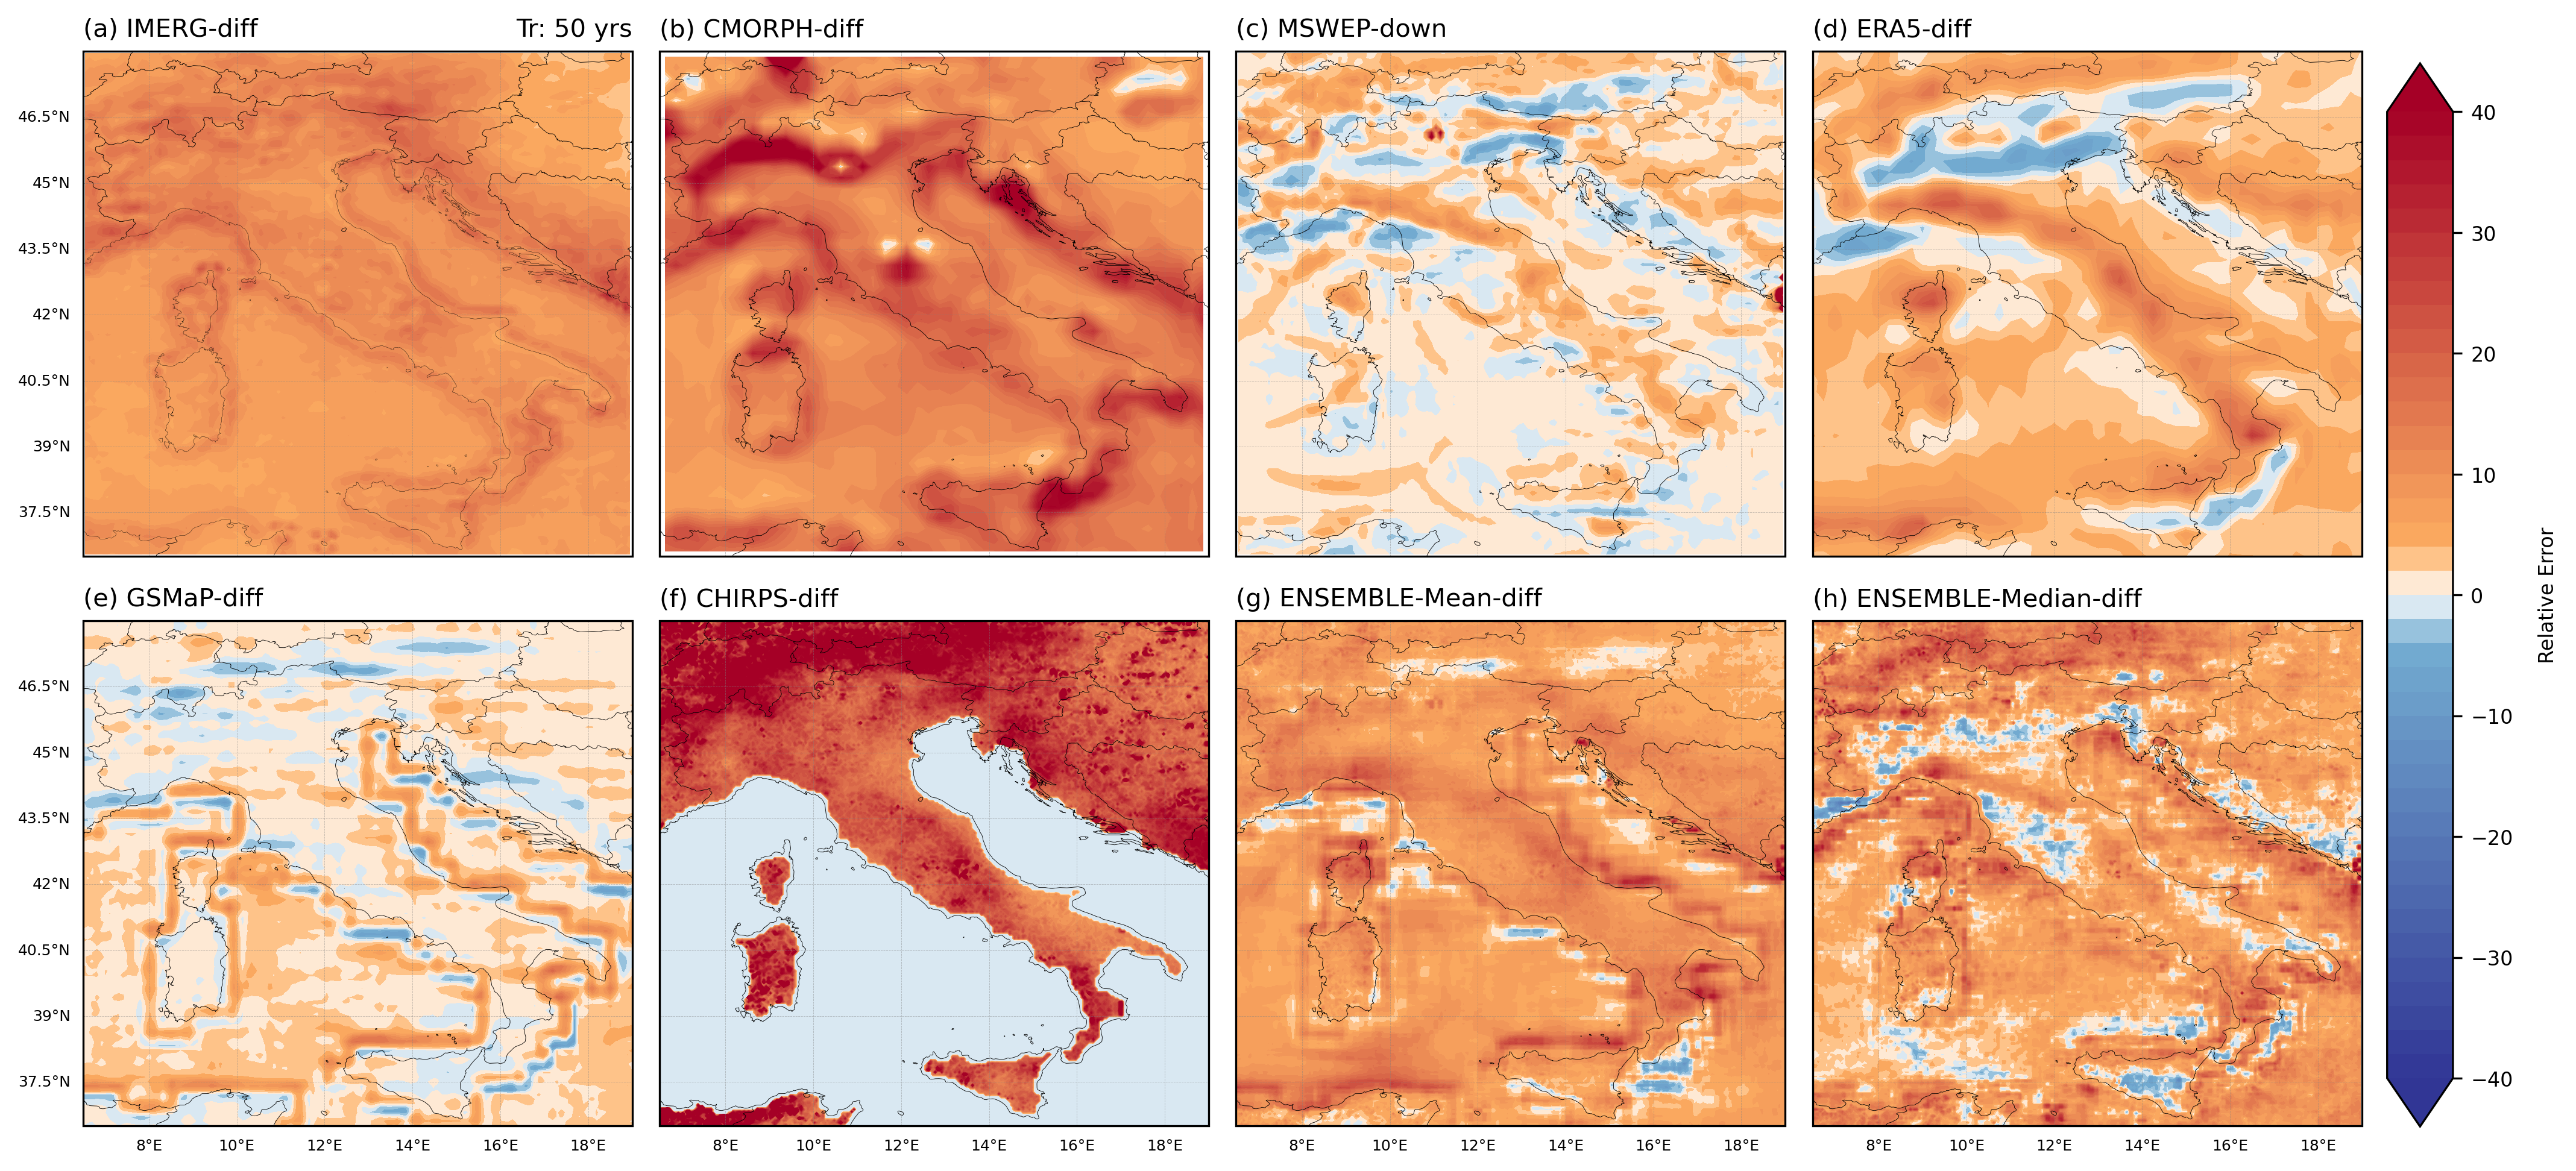

In [169]:
fonttitle = 10

proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(14,7),dpi=300)
gs = gridspec.GridSpec(2,4)

# ===========================================================================================================================================================================
# ===========================================================================================================================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.1,edgecolor='k')
ax1.add_feature(cfeature.BORDERS,linewidth=0.2,edgecolor='black',zorder=4)
# im = REGIONS_merged.plot(legend=False, facecolor="none", edgecolor='black', linewidth=0.1, ax=ax1, zorder=10)
# DEM.plot(facecolor='None', edgecolor='k', ax=ax1, linewidth=0.1, zorder=21, alpha=0.5)
a1 = ax1.contourf(lon2dIM, lat2dIM, MEVd_IM[pos,:,:]-MEVs_IM[pos,:,:], cmap=Diff_cmap, levels=Diff_levels,norm=norm, extend='both')

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = False
gl.right_labels = False
gl.left_labels = True
gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}

# cbar = plt.colorbar(a1, ax=ax1, fraction=0.056, pad=0.04)
# cbar.ax.tick_params(labelsize=6) 

ax1.set_title('(a) IMERG-diff', fontsize=fonttitle, loc='left')
ax1.set_title(f'Tr: {Tr[pos]} yrs', fontsize=fonttitle, loc='right')

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 1], projection = proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.2,edgecolor='k')
ax1.add_feature(cfeature.BORDERS,linewidth=0.2,edgecolor='black',zorder=4)
# im = REGIONS_merged.plot(legend=False, facecolor="none", edgecolor='black', linewidth=0.1, ax=ax1, zorder=10)
# DEM.plot(facecolor='None', edgecolor='k', ax=ax1, linewidth=0.1, zorder=21, alpha=0.5)
a1 = ax1.contourf(lon2dCM, lat2dCM, MEVd_CM[pos,:,:]-MEVs_CM[pos,:,:], cmap=Diff_cmap, levels=Diff_levels,norm=norm, extend='both')

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = False
gl.right_labels = False
gl.left_labels =False

gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}

# cbar = plt.colorbar(a1, ax=ax1, fraction=0.056, pad=0.04)
# cbar.ax.tick_params(labelsize=6) 

ax1.set_title('(b) CMORPH-diff', fontsize=fonttitle, loc='left')

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 2], projection = proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.2,edgecolor='k')
ax1.add_feature(cfeature.BORDERS,linewidth=0.2,edgecolor='black',zorder=4)
# im = REGIONS_merged.plot(legend=False, facecolor="none", edgecolor='black', linewidth=0.1, ax=ax1, zorder=10)
# DEM.plot(facecolor='None', edgecolor='k', ax=ax1, linewidth=0.1, zorder=21, alpha=0.5)
a1 = ax1.contourf(lon2dMS, lat2dMS, MEVd_MS[pos,:,:]-MEVs_MS[pos,:,:], cmap=Diff_cmap, levels=Diff_levels, norm=norm, extend='both')

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = False
gl.right_labels = False
gl.left_labels =False

gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}

# cbar = plt.colorbar(a1, ax=ax1, fraction=0.056, pad=0.04)
# cbar.ax.tick_params(labelsize=6) 

ax1.set_title('(c) MSWEP-down', fontsize=fonttitle, loc='left')

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 3], projection = proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.2,edgecolor='k')
ax1.add_feature(cfeature.BORDERS,linewidth=0.2,edgecolor='black',zorder=4)
# im = REGIONS_merged.plot(legend=False, facecolor="none", edgecolor='black', linewidth=0.1, ax=ax1, zorder=10)
# DEM.plot(facecolor='None', edgecolor='k', ax=ax1, linewidth=0.1, zorder=21, alpha=0.5)
a1 = ax1.contourf(lon2dER, lat2dER, MEVd_ER[pos,:,:]-MEVs_ER[pos,:,:], cmap=Diff_cmap, levels=Diff_levels, norm=norm, extend='both')

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = False
gl.right_labels = False
gl.left_labels = False

gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}

# cbar = plt.colorbar(a1, ax=ax1, fraction=0.056, pad=0.04)
# cbar.ax.tick_params(labelsize=6) 

ax1.set_title('(d) ERA5-diff', fontsize=fonttitle, loc='left')

# ===========================================================================================================================================================================
# ===========================================================================================================================================================================
ax1 = plt.subplot(gs[1, 0], projection = proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.2,edgecolor='k')
ax1.add_feature(cfeature.BORDERS,linewidth=0.2,edgecolor='black',zorder=4)
# im = REGIONS_merged.plot(legend=False, facecolor="none", edgecolor='black', linewidth=0.1, ax=ax1, zorder=10)
# DEM.plot(facecolor='None', edgecolor='k', ax=ax1, linewidth=0.1, zorder=21, alpha=0.5)
a1 = ax1.contourf(lon2dGS, lat2dGS, MEVd_GS[pos,:,:]-MEVs_GS[pos,:,:], cmap=Diff_cmap, levels=Diff_levels, norm=norm, extend='both')

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.right_labels = False
gl.left_labels =True

gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}

# cbar = plt.colorbar(a1, ax=ax1, fraction=0.056, pad=0.04)
# cbar.ax.tick_params(labelsize=6) 

ax1.set_title('(e) GSMaP-diff', fontsize=fonttitle, loc='left')

# ============================================================================================================================
ax1 = plt.subplot(gs[1, 1], projection = proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.2,edgecolor='k')
ax1.add_feature(cfeature.BORDERS,linewidth=0.2,edgecolor='black',zorder=4)
# im = REGIONS_merged.plot(legend=False, facecolor="none", edgecolor='black', linewidth=0.1, ax=ax1, zorder=10)
# DEM.plot(facecolor='None', edgecolor='k', ax=ax1, linewidth=0.1, zorder=21, alpha=0.5)
a1 = ax1.contourf(lon2dCH, lat2dCH, MEVd_CH[pos,:,:]-MEVs_CH[pos,:,:], cmap=Diff_cmap, levels=Diff_levels, norm=norm, extend='both')

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.right_labels = False
gl.left_labels =False

gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}

# cbar = plt.colorbar(a1, ax=ax1, fraction=0.056, pad=0.04)
# cbar.ax.tick_params(labelsize=6) 

ax1.set_title('(f) CHIRPS-diff', fontsize=fonttitle, loc='left')

# ============================================================================================================================
ax1 = plt.subplot(gs[1, 2], projection = proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.2,edgecolor='k')
ax1.add_feature(cfeature.BORDERS,linewidth=0.2,edgecolor='black',zorder=4)
# im = REGIONS_merged.plot(legend=False, facecolor="none", edgecolor='black', linewidth=0.1, ax=ax1, zorder=10)
# DEM.plot(facecolor='None', edgecolor='k', ax=ax1, linewidth=0.1, zorder=21, alpha=0.5)
a1 = ax1.contourf(lon2dEN, lat2dEN, MEVd_MEAN[pos,:,:]-MEVs_MEAN[pos,:,:], cmap=Diff_cmap, levels=Diff_levels, norm=norm, extend='both')

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.right_labels = False
gl.left_labels =False

gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}

# cbar = plt.colorbar(a1, ax=ax1, fraction=0.056, pad=0.04)
# cbar.ax.tick_params(labelsize=6) 

ax1.set_title('(g) ENSEMBLE-Mean-diff', fontsize=fonttitle, loc='left')

# ============================================================================================================================
ax1 = plt.subplot(gs[1, 3], projection = proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.2,edgecolor='k')
ax1.add_feature(cfeature.BORDERS,linewidth=0.2,edgecolor='black',zorder=4)
# im = REGIONS_merged.plot(legend=False, facecolor="none", edgecolor='black', linewidth=0.1, ax=ax1, zorder=10)
# DEM.plot(facecolor='None', edgecolor='k', ax=ax1, linewidth=0.1, zorder=21, alpha=0.5)
a1 = ax1.contourf(lon2dEN, lat2dEN, MEVd_MEDIAN[pos,:,:]-MEVs_MEDIAN[pos,:,:], cmap=Diff_cmap, levels=Diff_levels, norm=norm, extend='both')

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.right_labels = False
gl.left_labels =False

gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}

# cbar = plt.colorbar(a1, ax=ax1, fraction=0.056, pad=0.04)
# cbar.ax.tick_params(labelsize=6) 

ax1.set_title('(h) ENSEMBLE-Median-diff', fontsize=fonttitle, loc='left')

# ===========================================================================================================================================================================
# ===========================================================================================================================================================================
plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.05, hspace=0)

cbar_ax = fig.add_axes([0.96, 0.075, 0.026, 0.84])#0.96
cbar = fig.colorbar(a1, cax=cbar_ax, orientation='vertical')
cbar.ax.tick_params(labelsize=8)
cbar.set_label("Relative Error", fontsize=8, labelpad=10)

salida = os.path.join('..','figures','Article_down',f'Quantiles_ALL_DIFF_{Tr[pos]}yrs.png')
print(f'Export figure to: {salida}')
# plt.savefig(salida,transparent = False,bbox_inches ='tight',pad_inches = 0.1, facecolor=None)

## RSR data

In [150]:
# Mev_cmap = plt.cm.Spectral_r
# Mev_diff = plt.cm.coolwarm_r

# proj = ccrs.PlateCarree()

# fig = plt.figure(figsize=(8,7),dpi=300)
# gs = gridspec.GridSpec(2,3)

# # ===========================================================================================================================================================================
# # ===========================================================================================================================================================================
# ax1 = plt.subplot(gs[0, 0], projection = proj)
# ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)
# ax1.add_feature(cfeature.COASTLINE,linewidth=0.1,edgecolor='k')
# ax1.add_feature(cfeature.BORDERS,linewidth=0.2,edgecolor='black',zorder=4)
# # im = REGIONS_merged.plot(legend=False, facecolor="none", edgecolor='black', linewidth=0.1, ax=ax1, zorder=10)
# DEM.plot(facecolor='None', edgecolor='k', ax=ax1, linewidth=0.1, zorder=21, alpha=0.5)
# a1 = ax1.contourf(lon2dIM, lat2dIM, MEVd_IM[pos,:,:], cmap=Mev_cmap, levels=Mev_levels, extend='max')

# gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
# gl.top_labels = False
# gl.bottom_labels = False
# gl.right_labels = False
# gl.left_labels = True

# gl.xlabel_style = {'size': 4, 'color': 'k'}
# gl.ylabel_style = {'size': 4, 'color': 'k'}

# # cbar = plt.colorbar(a1, ax=ax1, fraction=0.056, pad=0.04)
# # cbar.ax.tick_params(labelsize=6) 

# ax1.set_title('(a) IMERG-down', fontsize=7, loc='left')
# ax1.set_title(f'Tr: {Tr[pos]} yrs', fontsize=7, loc='right')

# # ============================================================================================================================
# ax1 = plt.subplot(gs[0, 1], projection = proj)
# ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)
# ax1.add_feature(cfeature.COASTLINE,linewidth=0.1,edgecolor='k')
# ax1.add_feature(cfeature.BORDERS,linewidth=0.2,edgecolor='black',zorder=4)
# # im = REGIONS_merged.plot(legend=False, facecolor="none", edgecolor='black', linewidth=0.1, ax=ax1, zorder=10)
# DEM.plot(facecolor='None', edgecolor='k', ax=ax1, linewidth=0.1, zorder=21, alpha=0.5)
# a1 = ax1.contourf(lon2dCM, lat2dCM, MEVd_CM[pos,:,:], cmap=Mev_cmap, levels=Mev_levels, extend='max')

# gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
# gl.top_labels = False
# gl.bottom_labels = False
# gl.right_labels = False
# gl.left_labels =False

# gl.xlabel_style = {'size': 4, 'color': 'k'}
# gl.ylabel_style = {'size': 4, 'color': 'k'}

# # cbar = plt.colorbar(a1, ax=ax1, fraction=0.056, pad=0.04)
# # cbar.ax.tick_params(labelsize=6) 

# ax1.set_title('(b) CMORPH-down', fontsize=7, loc='left')

# # ============================================================================================================================
# ax1 = plt.subplot(gs[0, 2], projection = proj)
# ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)
# ax1.add_feature(cfeature.COASTLINE,linewidth=0.1,edgecolor='k')
# ax1.add_feature(cfeature.BORDERS,linewidth=0.2,edgecolor='black',zorder=4)
# # im = REGIONS_merged.plot(legend=False, facecolor="none", edgecolor='black', linewidth=0.1, ax=ax1, zorder=10)
# DEM.plot(facecolor='None', edgecolor='k', ax=ax1, linewidth=0.1, zorder=21, alpha=0.5)
# a1 = ax1.contourf(lon2dMS, lat2dMS, MEVd_MS[pos,:,:], cmap=Mev_cmap, levels=Mev_levels, extend='max')

# gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
# gl.top_labels = False
# gl.bottom_labels = False
# gl.right_labels = False
# gl.left_labels =False

# gl.xlabel_style = {'size': 4, 'color': 'k'}
# gl.ylabel_style = {'size': 4, 'color': 'k'}

# # cbar = plt.colorbar(a1, ax=ax1, fraction=0.056, pad=0.04)
# # cbar.ax.tick_params(labelsize=6) 

# ax1.set_title('(c) MSWEP-down', fontsize=7, loc='left')

# # ===========================================================================================================================================================================
# # ===========================================================================================================================================================================
# ax1 = plt.subplot(gs[1, 0], projection = proj)
# ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)
# ax1.add_feature(cfeature.COASTLINE,linewidth=0.1,edgecolor='k')
# ax1.add_feature(cfeature.BORDERS,linewidth=0.2,edgecolor='black',zorder=4)
# # im = REGIONS_merged.plot(legend=False, facecolor="none", edgecolor='black', linewidth=0.1, ax=ax1, zorder=10)
# DEM.plot(facecolor='None', edgecolor='k', ax=ax1, linewidth=0.1, zorder=21, alpha=0.5)
# a1 = ax1.contourf(lon2dER, lat2dER, MEVd_ER[pos,:,:], cmap=Mev_cmap, levels=Mev_levels, extend='max')

# gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
# gl.top_labels = False
# gl.bottom_labels = True
# gl.right_labels = False
# gl.left_labels = True

# gl.xlabel_style = {'size': 4, 'color': 'k'}
# gl.ylabel_style = {'size': 4, 'color': 'k'}

# # cbar = plt.colorbar(a1, ax=ax1, fraction=0.056, pad=0.04)
# # cbar.ax.tick_params(labelsize=6) 

# ax1.set_title('(d) ERA5-down', fontsize=7, loc='left')

# # ============================================================================================================================
# ax1 = plt.subplot(gs[1, 1], projection = proj)
# ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)
# ax1.add_feature(cfeature.COASTLINE,linewidth=0.1,edgecolor='k')
# ax1.add_feature(cfeature.BORDERS,linewidth=0.2,edgecolor='black',zorder=4)
# # im = REGIONS_merged.plot(legend=False, facecolor="none", edgecolor='black', linewidth=0.1, ax=ax1, zorder=10)
# DEM.plot(facecolor='None', edgecolor='k', ax=ax1, linewidth=0.1, zorder=21, alpha=0.5)
# a1 = ax1.contourf(lon2dGS, lat2dGS, MEVd_GS[pos,:,:], cmap=Mev_cmap, levels=Mev_levels, extend='max')

# gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
# gl.top_labels = False
# gl.bottom_labels = True
# gl.right_labels = False
# gl.left_labels =False

# gl.xlabel_style = {'size': 4, 'color': 'k'}
# gl.ylabel_style = {'size': 4, 'color': 'k'}

# # cbar = plt.colorbar(a1, ax=ax1, fraction=0.056, pad=0.04)
# # cbar.ax.tick_params(labelsize=6) 

# ax1.set_title('(e) GSMaP-down', fontsize=7, loc='left')

# # ============================================================================================================================
# ax1 = plt.subplot(gs[1, 2], projection = proj)
# ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)
# ax1.add_feature(cfeature.COASTLINE,linewidth=0.1,edgecolor='k')
# ax1.add_feature(cfeature.BORDERS,linewidth=0.2,edgecolor='black',zorder=4)
# # im = REGIONS_merged.plot(legend=False, facecolor="none", edgecolor='black', linewidth=0.1, ax=ax1, zorder=10)
# DEM.plot(facecolor='None', edgecolor='k', ax=ax1, linewidth=0.1, zorder=21, alpha=0.5)
# a1 = ax1.contourf(lon2dCH, lat2dCH, MEVd_CH[pos,:,:], cmap=Mev_cmap, levels=Mev_levels, extend='max')

# gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
# gl.top_labels = False
# gl.bottom_labels = True
# gl.right_labels = False
# gl.left_labels =False

# gl.xlabel_style = {'size': 4, 'color': 'k'}
# gl.ylabel_style = {'size': 4, 'color': 'k'}

# # cbar = plt.colorbar(a1, ax=ax1, fraction=0.056, pad=0.04)
# # cbar.ax.tick_params(labelsize=6) 

# ax1.set_title('(f) CHIRPS-down', fontsize=7, loc='left')

# # ===========================================================================================================================================================================
# # ===========================================================================================================================================================================
# plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.05, hspace=0)

# cbar_ax = fig.add_axes([0.96, 0.07, 0.026, 0.86])#0.96
# cbar = fig.colorbar(a1, cax=cbar_ax, orientation='vertical')
# cbar.ax.tick_params(labelsize=7)
# cbar.set_label("Relative Error", fontsize=7, labelpad=10)  

# salida = os.path.join('..','figures','Article_down',f'Quantiles_ALL_DOWN_{Tr[pos]}yrs.png')
# print(f'Export figure to: {salida}')
# plt.savefig(salida,transparent = False,bbox_inches ='tight',pad_inches = 0.1, facecolor=None)